<a href="https://colab.research.google.com/github/Arshad221b/Sign-Language-Recognition-/blob/master/ASLwithCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
from keras.models import Sequential 
from keras.layers import Conv2D,MaxPooling2D, Dense,Flatten, Dropout
from keras.datasets import mnist 
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.optimizers import SGD

Using TensorFlow backend.


In [2]:
!pip install PyDrive

    100% |████████████████████████████████| 993kB 21.4MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
download = drive.CreateFile({'id': '1wG0gS-bqjV6yz1YveuxkvHT5_2DOuT05'})
download.GetContentFile('train.csv')
train = pd.read_csv('train.csv')

In [0]:
download = drive.CreateFile({'id': '1q_Zwlu3RncjKq1YpiVtkiMPxIIueGRYB'})
download.GetContentFile('test.csv')
test = pd.read_csv('test.csv')

In [0]:
y_train = train['label'].values
y_test = test['label'].values

X_train = train.drop(['label'],axis=1)
X_test = test.drop(['label'], axis=1)

X_train = np.array(X_train.iloc[:,:])
X_train = np.array([np.reshape(i, (28,28)) for i in X_train])

X_test = np.array(X_test.iloc[:,:])
X_test = np.array([np.reshape(i, (28,28)) for i in X_test])

num_classes = 26
y_train = np.array(y_train).reshape(-1)
y_test = np.array(y_test).reshape(-1)

y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]

In [0]:
X_train = X_train.reshape((27455, 28, 28, 1))
X_test = X_test.reshape((7172, 28, 28, 1))

In [9]:

classifier = Sequential()
classifier.add(Conv2D(filters=8, kernel_size=(3,3),strides=(1,1),padding='same',input_shape=(28,28,1),activation='relu', data_format='channels_last'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Conv2D(filters=16, kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(MaxPooling2D(pool_size=(4,4)))
classifier.add(Dense(128, activation='relu'))
classifier.add(Flatten())
classifier.add(Dense(26, activation='softmax'))
classifier.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.fit(X_train, y_train, epochs=50, batch_size=100)


Instructions for updating:
Use tf.cast instead.
Epoch 1/50
27455/27455 [==============================] - 7s 242us/step - loss: 7.6854 - acc: 0.2546
Epoch 2/50
27455/27455 [==============================] - 2s 87us/step - loss: 0.6890 - acc: 0.7661
Epoch 3/50
27455/27455 [==============================] - 2s 87us/step - loss: 0.3952 - acc: 0.8629
Epoch 4/50
27455/27455 [==============================] - 2s 87us/step - loss: 0.2676 - acc: 0.9060
Epoch 5/50
27455/27455 [==============================] - 2s 88us/step - loss: 0.2072 - acc: 0.9270
Epoch 6/50
27455/27455 [==============================] - 2s 88us/step - loss: 0.1647 - acc: 0.9430
Epoch 7/50
27455/27455 [==============================] - 2s 88us/step - loss: 0.1333 - acc: 0.9542
Epoch 8/50
27455/27455 [==============================] - 2s 89us/step - loss: 0.1289 - acc: 0.9549
Epoch 9/50
27455/27455 [==============================] - 2s 87us/step - loss: 0.1016 - acc: 0.9652
Epoch 10/50
27455/27455 [==========================

In [18]:
accuracy = classifier.evaluate(x=X_test,y=y_test,batch_size=32)
print("Accuracy: ",accuracy[1])

7172/7172 [==============================] - 0s 68us/step
Accuracy:  0.9408812046848857


In [12]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 16)          0         
_________________________________________________________________
dense_1 (Dense)              (None, 3, 3, 128)         2176      
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
__________

In [0]:
from keras.utils.vis_utils import plot_model

In [0]:
plot_model(classifier, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [15]:
!apt install graphviz
!pip install pydot pydot-ng
!echo "Double check with Python 3"
!python -c "import pydot"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 10 not upgraded.
Double check with Python 3


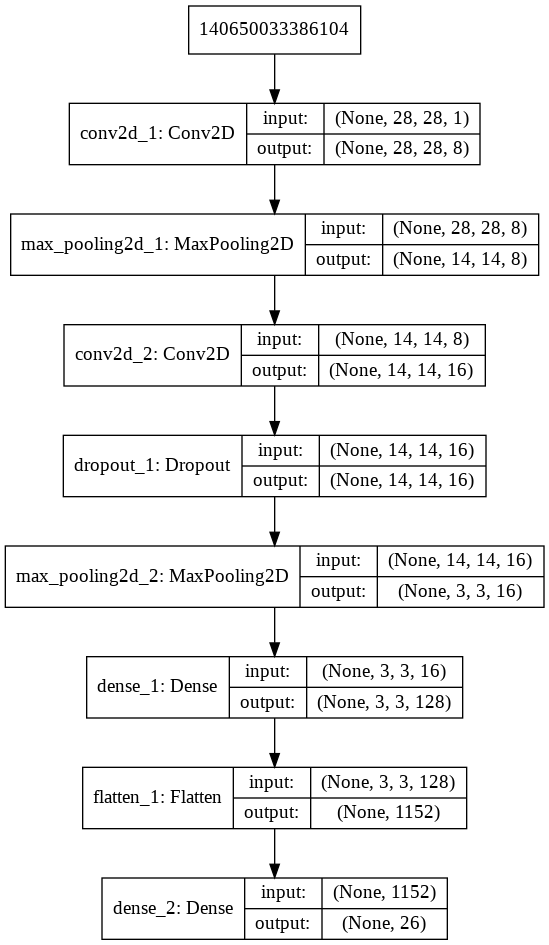

In [16]:
plot_model(classifier, show_shapes=True, show_layer_names=True, to_file='model.png')
from IPython.display import Image
Image(retina=True, filename='model.png')

In [17]:
classifier.save('CNNmodel.h5')
weights_file = drive.CreateFile({'title' : 'CNNmodel.h5'})
weights_file.SetContentFile('CNNmodel.h5')
weights_file.Upload()
drive.CreateFile({'id': weights_file.get('id')})

GoogleDriveFile({'id': '1cCWUVBKuM069e8UGzh2y95aPIOguAVee'})